***
# <font color=forestgreen size=10>INTRODUÇÃO</font>
- Arquivo	: notebook.ipynb
- Título	: Exercício 3 - Disciplina de Redes Neurais Artificiais (DELT/UFMG)
- Autor	    : Gustavo Augusto Ortiz de Oliveira (gstvortiz@hotmail.com) <br> <br> <br>
- Descrição: 
A prática desta semana introduz classificadores não lineares, especificamente Extreme Learning Machines (ELMs). Pede-se que, para que em pelo menos duas das bases disponibilizadas pelo professor, seja feita uma breve discussão a respeito de qual quantidade de neurônios levou aos melhores resultados. **Durante a realização do trabalho, optei por realizar as análises sobre as quatro bases, visto que a implementação poderia ser bastante simples a partir da criação de uma classe e a utilização de estruturas de repetição.**
***

In [1]:
import os
from PIL import Image
import numpy as np
from numpy import tanh
from numpy.random import uniform
from numpy.linalg import pinv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
np.set_printoptions(suppress=True, precision=3)

***
# <font color=orange size=10>CONHECENDO DADOS</font>
***

## [1] CARREGANDO DATASETS 

In [2]:
def SepararDados(df):
    X = df.drop('y', axis = 1).values
    y = df['y'].values
    return X, y

data = [pd.read_csv(f'data/{df}.csv') for df in ['2dnormals', 'xor', 'circle', 'spirals']]

## [2] VISUALIZANDO DISTRIBUIÇÕES

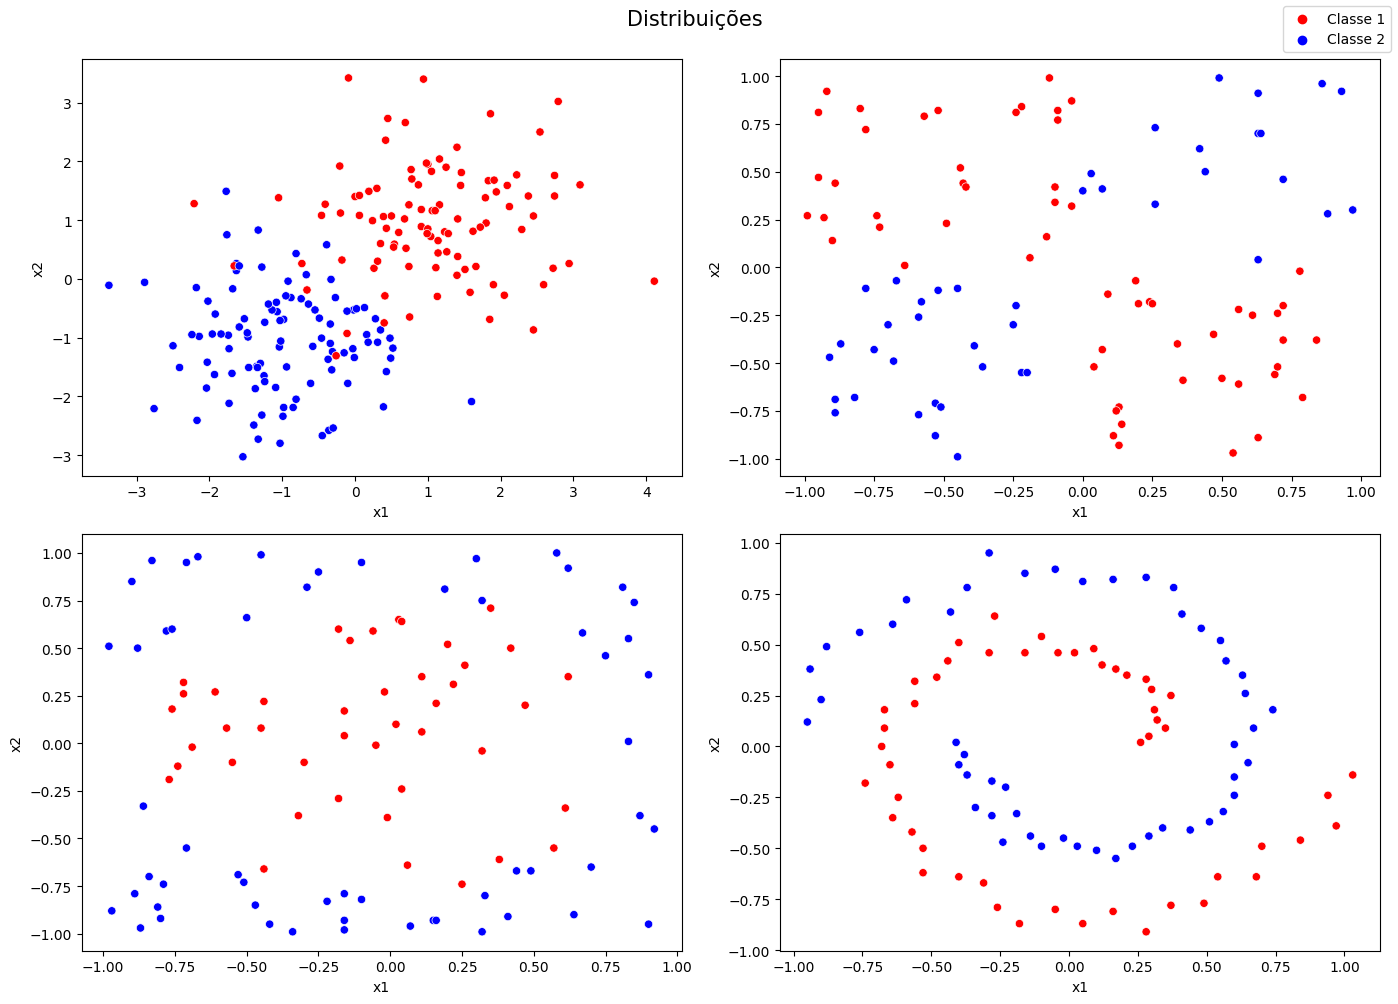

In [3]:
fig = plt.figure(figsize=(14, 10))
fig.suptitle('Distribuições', fontsize = 15, y = 1.0)
for i, df in enumerate(data):
    ax = fig.add_subplot(2, 2, i + 1)
    sns.scatterplot(data=df, x='x1', y='x2', hue='y', ax=ax, palette=['red', 'blue'])
    ax.get_legend().remove()
handles, _ = ax.get_legend_handles_labels()
fig.legend(handles=handles, labels=['Classe 1', 'Classe 2'], loc='upper right')
plt.tight_layout()
plt.show()


***
# <font color=indianred size=10>ARQUITETURA NEURAL</font>
***

## [1]. IMPLEMENTAÇÃO DA CLASSE ELM

In [4]:
class ELM:
    def __init__(self, p):
        self.p = p
        self.Z = None
        self.w = None

    def fit(self, X, y):
        n = X.shape[1]
        self.Z = uniform(-0.5, 0.5, (n, self.p))
        H = tanh(X.dot(self.Z))
        self.w = pinv(H).dot(y)

    def predict(self, X):
        ŷ = tanh(X.dot(self.Z)).dot(self.w)
        return np.where(ŷ > 0 , 1, -1)
    
    def SuperficieDeSeparacao(self, X, y, ax, alpha = 0.3):
        sns.scatterplot(x = X[:, 1], y = X[:, 2], hue = y, ax = ax, palette = ['red', 'blue'])
        ax.set_title(f'Contorno com p = {self.p}')
        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()
        eixo_x = np.linspace(xmin, xmax, 100)
        eixo_y = np.linspace(ymin, ymax, 100)
        xx, yy = np.meshgrid(eixo_x, eixo_y)
        pontos = np.column_stack((xx.ravel(), yy.ravel()))
        pontos = np.column_stack((np.ones(pontos.shape[0]), pontos))
        ŷ = self.predict(pontos).reshape(xx.shape)
        ax.contourf(xx, yy, ŷ, cmap='vlag_r', alpha=alpha)
        ax.get_legend().remove()

    def Desempenho(self, score, ax):
        sns.lineplot(score, ax = ax)
        ax.set_title('Erro por Quantidade de Neurônios')
        ax.set_ylim(0, 1.05)
        ax.set_xlabel('p')
        ax.set_ylabel('Erro')

***
# <font color=royalblue size=10>ANÁLISE VISUAL</font>
***

## [1]. CONDIÇÃO DE PARADA

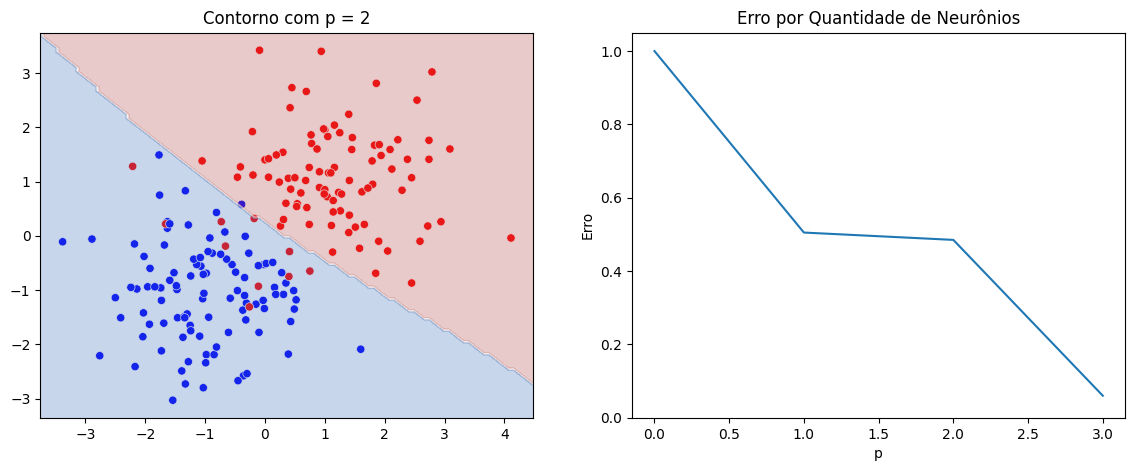

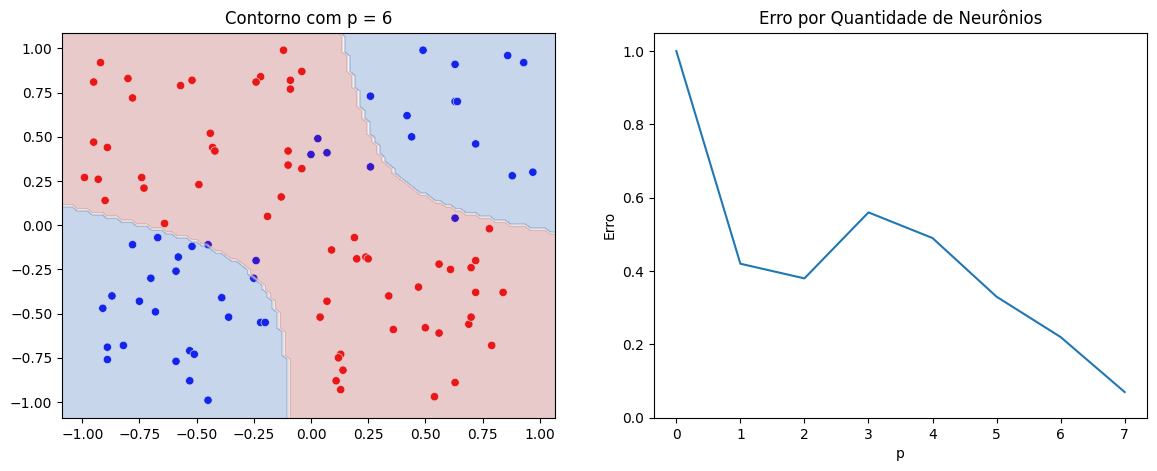

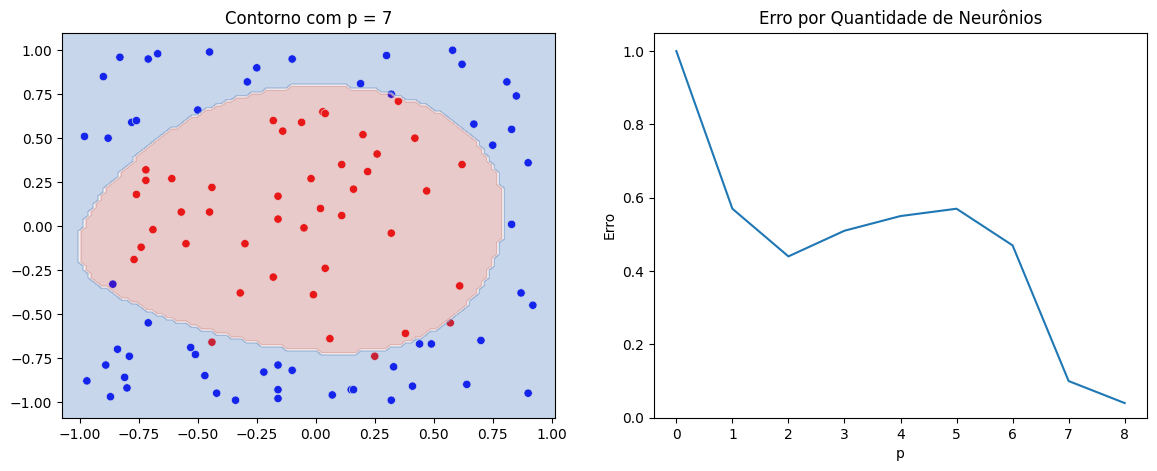

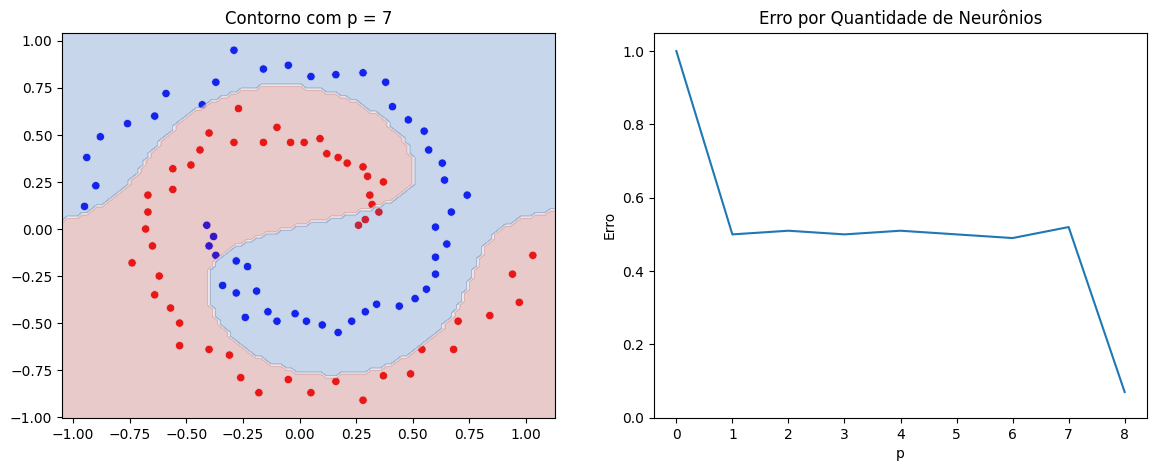

In [5]:
for df in data:
    # Preparação
    X, y = SepararDados(df)

    # Iteração
    score = [1]
    for p in range(100):
        Neuronio = ELM(p)
        Neuronio.fit(X, y)
        ŷ = Neuronio.predict(X)
        
        # Condição de Parada
        erro = sum(y != ŷ)/len(y)
        score.append(erro)
        if erro < 0.08: break

    # Visualização
    fig, axs = plt.subplots(1, 2, figsize = (14, 5))
    Neuronio.SuperficieDeSeparacao(X, y, axs[0])
    Neuronio.Desempenho(score, axs[1])
    plt.show()

## [2]. EVOLUÇÃO VISUAL

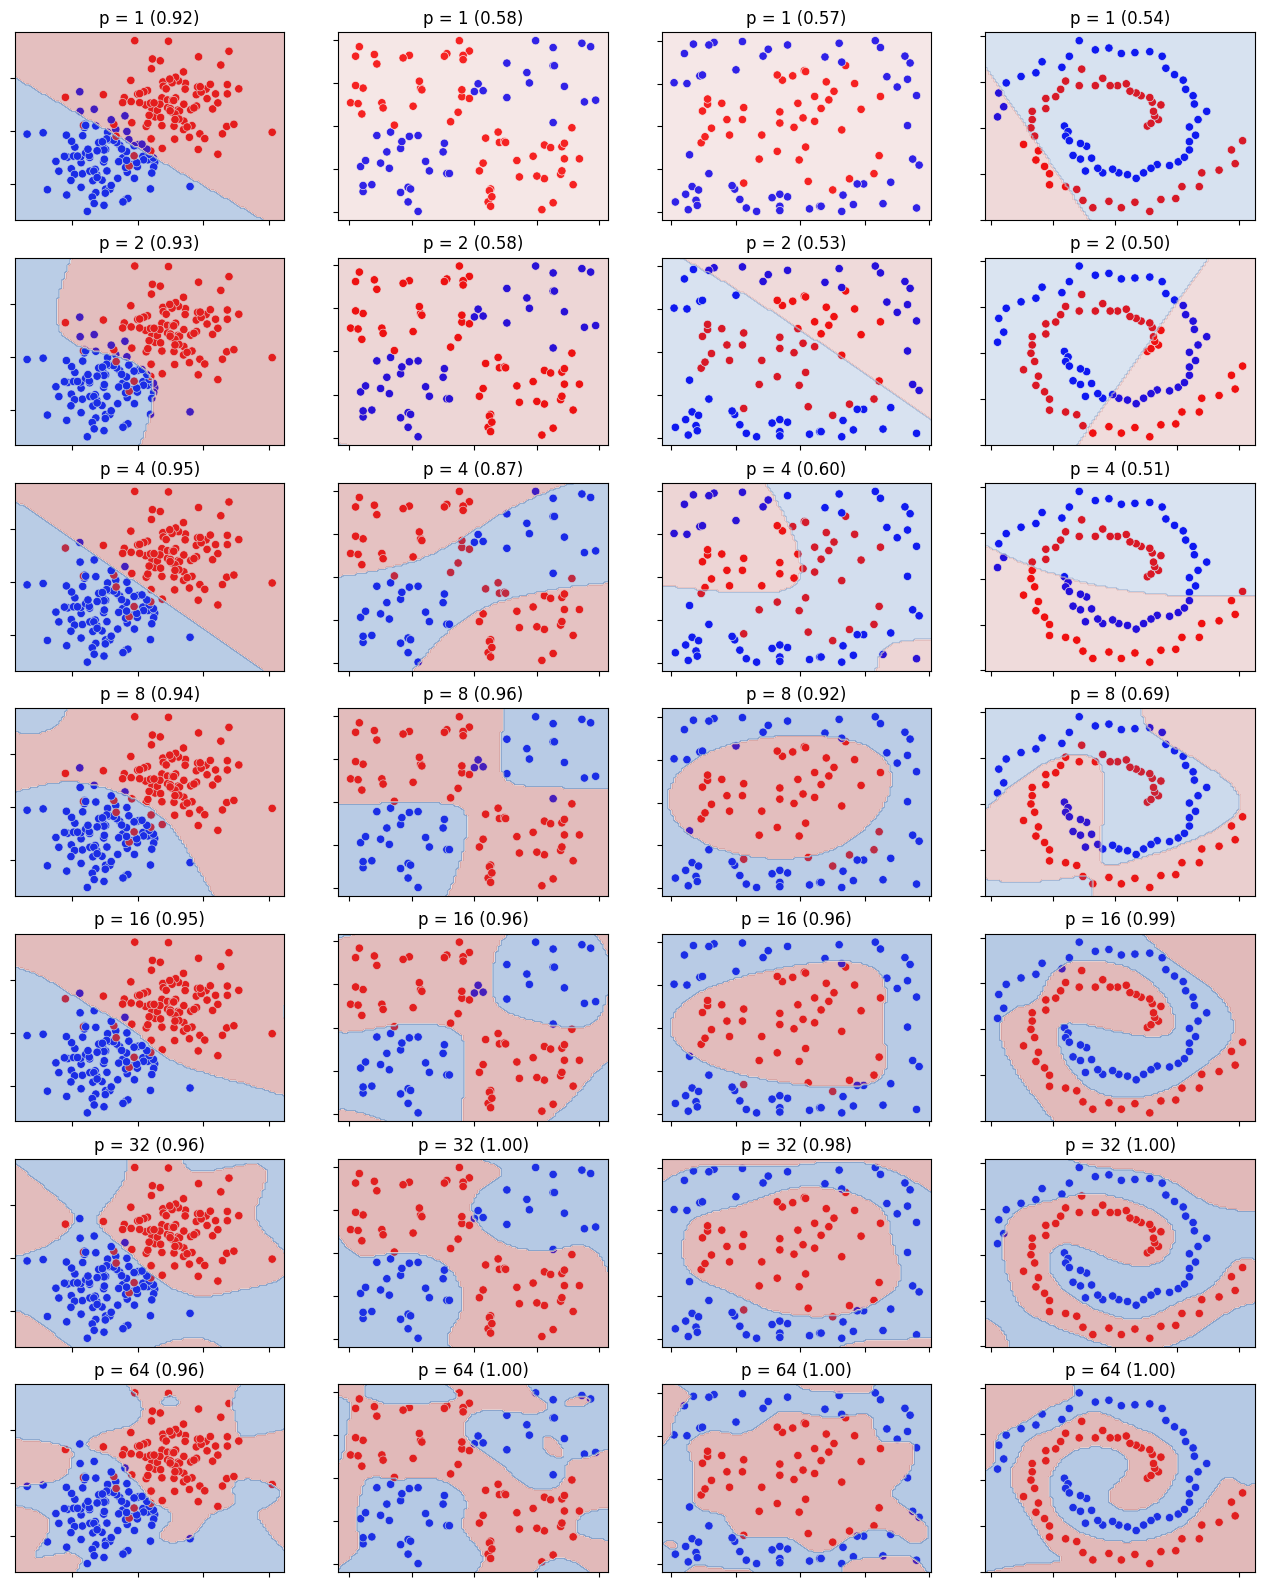

In [6]:
rows, cols = 7,4
fig, axs = plt.subplots(rows, cols, figsize = (16, 20))

for j in range(cols):
    X, y = SepararDados(data[j])
    for i in range(rows):
        Neuronio = ELM(2**(i))
        Neuronio.fit(X, y)
        ŷ = Neuronio.predict(X)
        score = sum(y == ŷ)/len(y)
        
        Neuronio.SuperficieDeSeparacao(X, y, axs[i, j], alpha=score*0.4)
        axs[i, j].set_title(f'p = {2**(i)} ({score:.2f})')
        axs[i, j].set_xticklabels([])
        axs[i, j].set_yticklabels([])

## [3] GIFS

In [7]:
for p in range(50):
    fig, axs = plt.subplots(2, 2, figsize = (8, 6))
    fig.suptitle(f'p = {p}')
    for i, df in enumerate(data):
        ax = axs[i//2, i%2]
        X, y = SepararDados(df)
        Neuronio = ELM(p)
        Neuronio.fit(X, y)
        ŷ = Neuronio.predict(X)
        Neuronio.SuperficieDeSeparacao(X, y, ax)
        ax.set_title('')
    plt.savefig(f'img/{p}.png')
    plt.close()
    
imagens = []
for i in range(50):
    imagem = Image.open(os.path.join('img', f'{i}.png'))
    imagens.append(imagem)
imagens[0].save('gif.gif', save_all=True, append_images=imagens[1:], duration=500, loop=0)

<div align="center">
    <img src="gif.gif">
</div>